In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
import numpy as np

In [0]:
%%time

df = pd.read_csv('/content/drive/My Drive/nl2ml_data/code_blocks.csv', sep='\t', delimiter='\t',
                 encoding='utf-8', error_bad_lines=False, engine='python')

Skipping line 7662: field larger than field limit (131072)
Skipping line 24774: field larger than field limit (131072)
Skipping line 45491: field larger than field limit (131072)
Skipping line 53234: field larger than field limit (131072)
Skipping line 53235: field larger than field limit (131072)
Skipping line 53236: field larger than field limit (131072)
Skipping line 54382: field larger than field limit (131072)
Skipping line 60222: field larger than field limit (131072)
Skipping line 60223: field larger than field limit (131072)
Skipping line 60224: field larger than field limit (131072)
Skipping line 60225: field larger than field limit (131072)
Skipping line 60226: field larger than field limit (131072)
Skipping line 60227: field larger than field limit (131072)
Skipping line 60228: field larger than field limit (131072)
Skipping line 60229: field larger than field limit (131072)
Skipping line 60230: field larger than field limit (131072)
Skipping line 60231: field larger than fi

CPU times: user 3.3 s, sys: 260 ms, total: 3.56 s
Wall time: 3.59 s


In [0]:
print(df.shape)

(271587, 2)


**TAGGING**

In [0]:
graph = {'imports':['import ', ' from ']
          ,'load_data':['.load', '_load', '_dump' '.csv', 'glob', 'pickle.', 'read_', 'download', '.txt', '.json', '.png', '.jpg', '.jpeg']
          ,'preprocessing':['preprocess', 'plot.', 'plt.', 'graph', 'histogram', 'hist', 'sns.', 'plotline', 'chart', 'diagram', 'heatmap', 'figure', 'encode', 'fill', 'merge', 'vectorize', 'generation', 'augmentation', 'stemming', 'lemmatization', 'scale', 'normalize', 'crop', 'convert', 'resize']
          ,'model':['LinearRegression', 'RandomForest', 'Ridge', 'Lasso', 'SGD', 'LogisticRegression', 'SVM', 'SVC', 'SVR', 'Layer', 'xgboost', 'LGBM', 'CatBoost']
          ,'train': ['.fit_transform', '.fit', 'epoch', 'loss', 'learn', 'optimizer']
          ,'predict':['.predict', '_error', '.mean_', '_score', '_distance']
}

In [0]:
def tokens_search(df, tokens, new_column_name):
    df[new_column_name] = 0
    for i in range(len(df)):
        percents = str(round(100*i/len(df),1))
        print(percents + '%\r', end='')
        for token in tokens:
            if token in df['code_block'][i]:
                df[new_column_name][i] = 1
                break
    return df

In [0]:
%%time
for i in range(0, len(graph)):
    vertex = list(graph.keys())[i]
    tokens = graph[vertex]
    df = tokens_search(df, tokens, vertex)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 8min 11s, sys: 1min 12s, total: 9min 23s
Wall time: 8min 1s


In [0]:
df['imports'].value_counts()

0    232091
1     39496
Name: imports, dtype: int64

**SVM** for imports

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
X = df['code_block']
y = df['imports']

In [0]:
vectorizer = TfidfVectorizer(ngram_range = (1,2), smooth_idf = True)
X = vectorizer.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
grid = {"C": [1, 10, 100]}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
model = SVC(kernel="linear", random_state=241)
gs = GridSearchCV(model, grid, scoring="accuracy", cv=cv, verbose=1, n_jobs=-1)

In [0]:
%%time

gs.fit(X_train[:100000], y_train.ravel()[:100000])

C = gs.best_params_.get('C')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 78.6min finished


CPU times: user 13min 37s, sys: 244 ms, total: 13min 38s
Wall time: 1h 32min 12s


In [0]:
print(C)

10


**LINEAR KERNEL**

In [0]:
%%time

model = SVC(C=10, kernel="linear", random_state=241)
model.fit(X_train, y_train.ravel()) 

CPU times: user 38min 53s, sys: 0 ns, total: 38min 53s
Wall time: 38min 55s


In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
y_pred = model.predict(X_test)

In [0]:
metrics.precision_score(y_test, y_pred)

0.9941540577716643

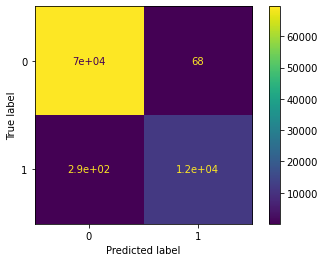

In [0]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [0]:
metrics.f1_score(y_test, y_pred)

0.984882681088447

**RBF KERNEL**

In [37]:
%%time

model = SVC(C=10, kernel="rbf", random_state=241)
model.fit(X_train, y_train.ravel()) 

CPU times: user 1h 58min 38s, sys: 0 ns, total: 1h 58min 38s
Wall time: 1h 58min 44s


In [0]:
y_pred = model.predict(X_test)

In [40]:
metrics.precision_score(y_test, y_pred)

0.9948610748192667

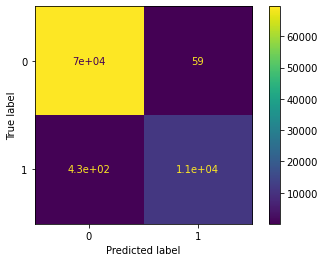

In [41]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [42]:
metrics.f1_score(y_test, y_pred)

0.9790845191153781